# Setup Packages 

In [232]:
H0=100
DEG_TO_RAD=0.01745328888
RAD_TO_DEG=57.2957914331
speed_of_light=299792.458
PI=3.14159
#install.packages('ggplot2')
library('ggplot2')
#install.packages("astrolibR")
library('astrolibR')
#install.packages('gridExtra')
library("gridExtra")
#install.packages("scatterplot3d")
library("scatterplot3d")

# Setup Directory

In [233]:
getwd() #get working directory
setwd(".") #set working directory


[1] "/Users/jap/hubiC/Source"

# Get Data off Website

In [234]:
data <- read.csv("http://jpiscionere.github.io/HOPCAT2005TabSep.csv")

#data=read.csv("../Data/HOPCAT2005TabSep.csv")
#data=read.table("../Data.txt",head=T)
df_HIPASS=data.frame(data)
df_HIPASS$M_HI=2.365*10^5*(df_HIPASS$vel_mom/H0)^2*df_HIPASS$Sint #calculate HI Mass
df_HIPASS$Distance=df_HIPASS$vel_mom/H0 #use hubble approx. for distance even though astroR has a cosmo calc
summary(df_HIPASS)



       ID               hipass_name       ra_str          dec_str    
 Min.   :   1   HIPASSJ0000-07:   1   4:58:01:   3   -01:41:57:   2  
 1st Qu.:2076   HIPASSJ0000-40:   1   0:02:30:   2   -01:59:18:   2  
 Median :3412   HIPASSJ0002-03:   1   0:34:12:   2   -03:52:00:   2  
 Mean   :3418   HIPASSJ0002-07:   1   0:41:43:   2   -04:08:19:   2  
 3rd Qu.:4872   HIPASSJ0002-15:   1   0:52:17:   2   -04:15:13:   2  
 Max.   :6307   HIPASSJ0002-52:   1   1:02:19:   2   -04:52:54:   2  
                (Other)       :4309   (Other):4302   (Other)  :4303  
    vel_mom         width_50max          Sp              Sint        
 Min.   :  226.8   Min.   :  0.0   Min.   :0.0224   Min.   :   0.10  
 1st Qu.: 1779.7   1st Qu.: 99.0   1st Qu.:0.0461   1st Qu.:   5.30  
 Median : 2876.3   Median :156.1   Median :0.0622   Median :   8.50  
 Mean   : 3275.1   Mean   :178.4   Mean   :0.1072   Mean   :  15.76  
 3rd Qu.: 4347.5   3rd Qu.:236.7   3rd Qu.:0.1013   3rd Qu.:  14.80  
 Max.   :12324.1   M

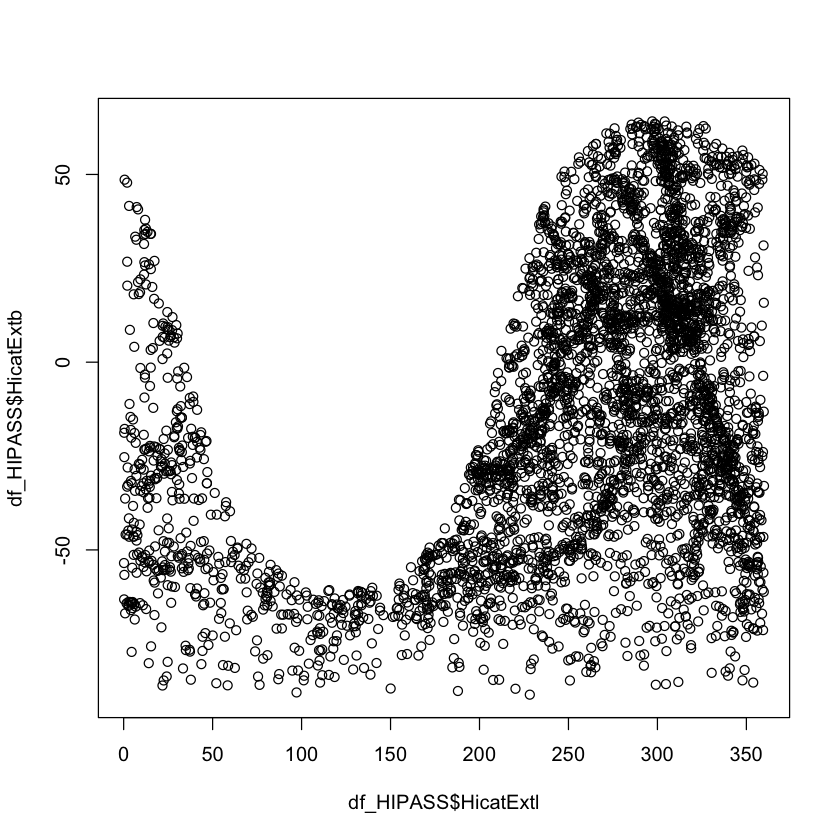

In [235]:
plot(df_HIPASS$HicatExtl,df_HIPASS$HicatExtb) #try the tab complete if using the GUI or notebook

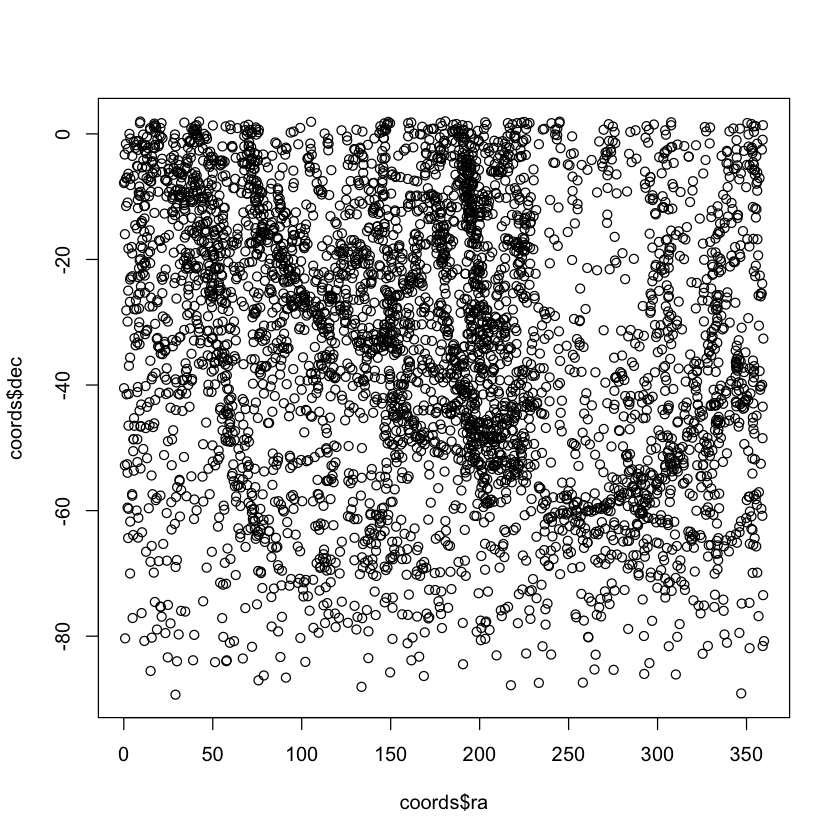

In [236]:
coords=glactc(gl = df_HIPASS$HicatExtl,gb = df_HIPASS$HicatExtb,j=2,year = 2000,degree = TRUE) #using astroR package
plot(coords$ra,coords$dec)
df_HIPASS$RA=coords$ra
df_HIPASS$Dec=coords$dec

# We are interested in Morphology, but the column is super messy

In [237]:
df_HIPASS$Morphology


[1] SAB(rs+)c            IBm? pec             Sa-b                
   [4] SA:(rs)bc:           Im                   SB(s)m:             
   [7] IB(s)m:              Sb: sp               XXXXX               
  [10] XXXXX                XXXXX                SB(rs)d             
  [13] XXXXX                Sc                   S pec (Ring B)      
  [16] SA(s)c               SA(s)d               SB(s)m              
  [19] SB(s)dm:             XXXXX                SAB(rs)c: pec       
  [22] SA(s)m:              Sc                   SA(r)c              
  [25] Dwarf                SB(s)c: pec          XXXXX               
  [28] SAB(rs)c             SBc: pec             Sc                  
  [31] SAB(rs)cd            Sa-b                 SAB(s)b:            
  [34] SB(s)cd: sp          SB(s)m               SA(r)bc             
  [37] Sa                   SA(s)cd              (R'_2)SAB(rs)cd     
  [40] SB(s)d               SB(s)c               SB(s)dm             
  [43] (R'_2)SB(rs)bc       SAB(s)c              XXXXX               
  [46] SB(rs)c              S...                 XXXXX               
  [49] (R')SA(rs)b          (R'_2)SB(rs)cd       SB(s)m              
  [52] (SA0?) + (SBd:)      SB(s)cd              S...                
  [55] SA(rs)c:             SB0^-                IB(s)m              
  [58] SA0^0                Dwarf                S...                
  [61] XXXXX                Sc                   SB(rs)cd            
  [64] (R)SAa: pec          XXXXX                Sc                  
  [67] Scp                  SBa                  SB(r)cd:            
  [70] Sb? sp               SA(rs)c              SB(s)c              
  [73] (R:)SAB(r)b    Sy1   Sm                   SAB(s)d:            
  [76] XXXXX                XXXXX                XXXXX               
  [79] SB(s)cd: sp          Sc                   I0? pec             
  [82] SA(rs)c              Sa                   XXXXX               
  [85] SA(s)c         Sy2   SA(s)0/a:            Sbc                 
  [88] SB...                SB(s)c: sp           SAB(r)d             
  [91] XXXXX                SAB(rs)bc:           SB...               
  [94] (R')SB(r)bc pec      SB(s)d               IB(s)m              
  [97] SAB(r)c              XXXXX                XXXXX               
 [100] (R':)SB(rs)bc        Sc                   XXXXX               
 [103] SB(s)d               SAB(s)d:             Sb-c                
 [106] I0                   SB(s)d               SAB(s)m             
 [109] SA(s)dm              SB.../Irr            XXXXX               
 [112] Im                   XXXXX                SA(s)c: sp          
 [115] Sb                   XXXXX                SA(s)c              
 [118] SB(s)d: sp           SA(s)cd              (R')SA(rs)a    HII  
 [121] XXXXX                Sb                   (R')SAB(rs)c        
 [124] SB(rs+)bc:           S0+:                 SAB(r)dm            
 [127] S?                   SAB(rs)c             ...                 
 [130] IAB(s)m              Sc:                  XXXXX               
 [133] SB(s)m               XXXXX                SAB(rs)m            
 [136] Dwarf                (R)SAB(r)a           IB(s)m              
 [139] SB0?           HII   pec                  XXXXX               
 [142] SAB(rs)b             XXXXX                XXXXX               
 [145] (R':)SAB(rl)a        SAB(s)b pec          (R)SB(r)b           
 [148] IB(s)m               Sc? sp               SAB(rs)bc      HII  
 [151] S...                 XXXXX                XXXXX               
 [154] XXXXX                SA(s)c               SB(s)m              
 [157] SB(rs)c              Spec                 SB(r)b:             
 [160] XXXXX                SB(s)cd              Scd                 
 [163] SA(rs)c              XXXXX                SAB(s)m:            
 [166] SB(rs)cd             SAB(rs:)b:           Sc                  
 [169] SAB(s)c              XXXXX                XXXXX               
 [172] XXXXX 

In [238]:
frequency<-table(df_HIPASS$Morphology) #table is a very useful command to summarize factors
summary(frequency)
frequency=as.data.frame(frequency) #let's turn it into a data frame so we can sort
frequency=frequency[order(frequency$Freq,decreasing=TRUE),] #sort the whole data frame by the frequency of each morphology
frequency

Number of cases in table: 4315 
Number of factors: 1 

Var1                 Freq
1037 XXXXX                1113
375  S...                  120
300  IB(s)m                100
910  SB(s)m                 89
984  Sc                     69
351  S                      54
708  Sb                     44
901  SB(s)dm                44
369  S?                     40
499  SA(s)c                 39
607  SAB(rs)c               39
890  SB(s)d                 37
332  Irr                    30
877  SB(s)cd                30
249  Dwarf                  29
599  SAB(rs)bc              27
804  SB(rs)c                26
862  SB(s)c                 26
916  SB(s)m:                26
1009 Sd                     26
681  SAB(s)m                25
726  Sb:                    25
946  Sbc                    21
816  SB(rs)d                20
998  Scd                    20
1    ...                    19
618  SAB(rs)cd              19
655  SAB(s)c                19
793  SB(rs)bc               19
305  IB(s)m:                17
⋮    ⋮                    ⋮   
989  Sc-Irr               1   
991  Sc: pec              1   
996  Sc? sp         HII   1   
997  Sc+; Sbrst     HII   1   
999  Scd;high incl        1   
1003 Scd? pec sp          1   
1004 Scd? sp              1   
1005 Scd?;s.p.br.* on blg 1   
1006 Scd/BCD              1   
1007 Scp                  1   
1008 Scpec: sp            1   
1011 Sd;v.edge-on         1   
1012 Sd: sp               1   
1013 Sd?                  1   
1017 Sdm:           HII   1   
1018 Sdm: sp              1   
1019 Sdm? sp              1   
1021 Sm pec?              1   
1023 Sm: sp               1   
1024 Sm? sp               1   
1025 sm.br.blg            1   
1026 Sm/Im                1   
1027 SO pec?        HII   1   
1029 Spec                 1   
1030 Spec sp; LINER Sy2   1   
1032 Spiral edge-on       1   
1033 Sy1.8                1   
1034 Sy2                  1   
1035 vLSB disk            1   
1036 vvLSB disk           1

# Let's look closer at the top 10 Morphological Types

[1] S...     IB(s)m   SB(s)m   Sc       S        Sb       SB(s)dm  S?      
 [9] SA(s)c   SAB(rs)c
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1] S...     IB(s)m   SB(s)m   Sc       S        Sb       SB(s)dm  S?      
 [9] SA(s)c   SAB(rs)c
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1] 638

[1] Sc       SA(s)c   SB(s)m   Sc       SAB(rs)c Sc       SB(s)m   SB(s)dm 
  [9] S...     SB(s)m   S...     IB(s)m   S...     Sc       Sc       Sc      
 [17] IB(s)m   Sc       Sb       SA(s)c   Sb       S?       SAB(rs)c SB(s)m  
 [25] IB(s)m   IB(s)m   S...     SA(s)c   SB(s)m   Sc       IB(s)m   IB(s)m  
 [33] S...     SAB(rs)c S...     Sc       Sc       S...     Sc       SB(s)m  
 [41] SB(s)dm  SAB(rs)c S...     SAB(rs)c SA(s)c   IB(s)m   SB(s)m   IB(s)m  
 [49] S        Sc       S        S        SA(s)c   S...     SB(s)m   SB(s)m  
 [57] S...     Sc       Sb       S...     IB(s)m   SB(s)dm  SAB(rs)c SA(s)c  
 [65] S        SA(s)c   S...     S...     IB(s)m   IB(s)m   Sb       S...    
 [73] Sb       IB(s)m   Sb       Sb       S...     S        IB(s)m   SB(s)m  
 [81] SB(s)m   SB(s)m   Sc       SB(s)m   S        SB(s)m   SB(s)m   S?      
 [89] Sc       S...     S        IB(s)m   SB(s)m   IB(s)m   Sc       IB(s)m  
 [97] IB(s)m   S...     S...     S...    
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”

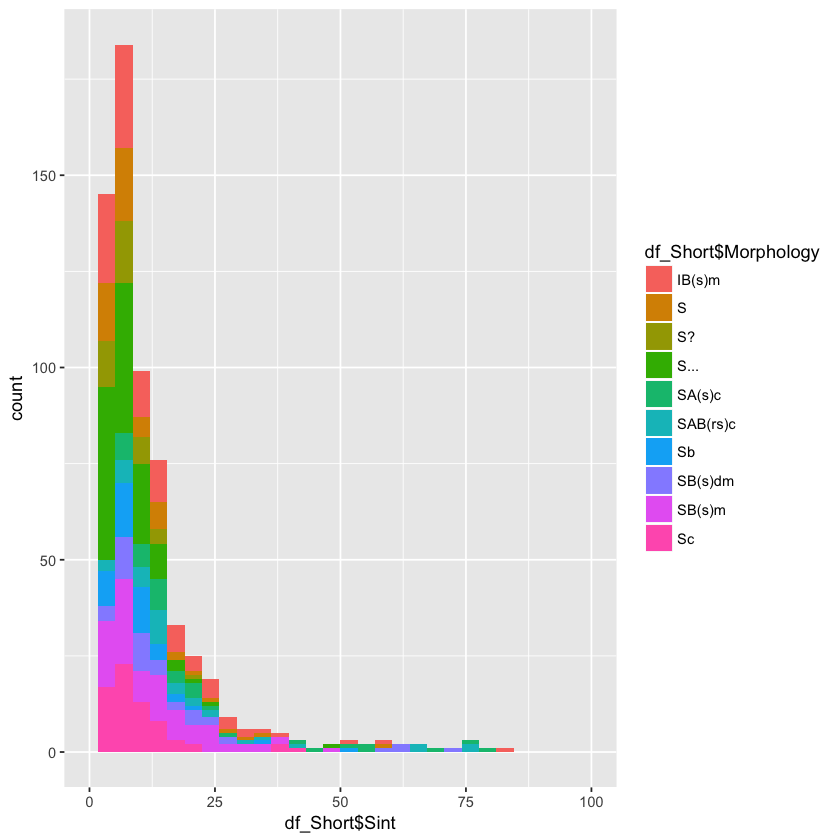

In [251]:
frequency$Var1[c(2:11)] #Skipping "XXXXX'
morphs=frequency$Var1[c(2:11)] #Putting the morph types in a vector
morphs #checking
df_Short <- df_HIPASS[df_HIPASS$Morphology %in% morphs, ] #subsetting the data frame to only those galaxies whose morphs are in the vector 
length(df_Short$Morphology) #checking that the data frame is smaller
df_Short$Morphology[c(1:100)] #checking that there are only the morphs we want
qplot(df_Short$Sint,fill=df_Short$Morphology,xlim=c(0,100)) #qplot "quick plot" is a ggplot tool

In [245]:
#this is one approach-- cleaning up the data, but it requires significant prior knowledge 
df_HIPASS$Morphology_Filtered=df_HIPASS$Morphology
df_HIPASS$Morphology_Filtered="LTG"

E_index=which(grepl('E', df_HIPASS$Morphology)=="TRUE" & 
              grepl('LINER',df_HIPASS$Morphology)=="FALSE" & 
              grepl('2MASS',df_HIPASS$Morphology)=="FALSE" &
              grepl('NELG',df_HIPASS$Morphology)=="FALSE")

df_HIPASS$Morphology_Filtered[grepl('XXXXX', df_HIPASS$Morphology)=="TRUE"]="Unclassified"
df_HIPASS$Morphology_Filtered[E_index]="E"
df_HIPASS$Morphology_Filtered[grepl('S0', df_HIPASS$Morphology)=="TRUE"]="S0"

df_HIPASS$Morphology[which(df_HIPASS$Morphology=="E")]


[1] E E E E E E E E E E E E E E E E
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

# Using ggplot for the first time http://docs.ggplot2.org/current/

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


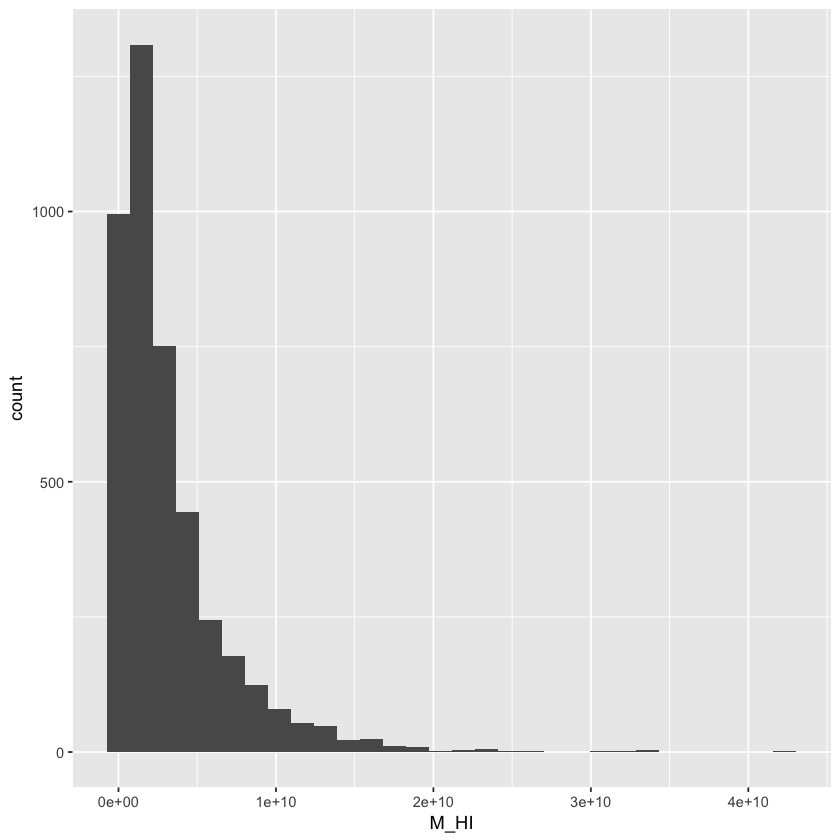

In [246]:
ggplot(df_HIPASS,aes(M_HI)) + #set up the data
geom_histogram() #tell it what to plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


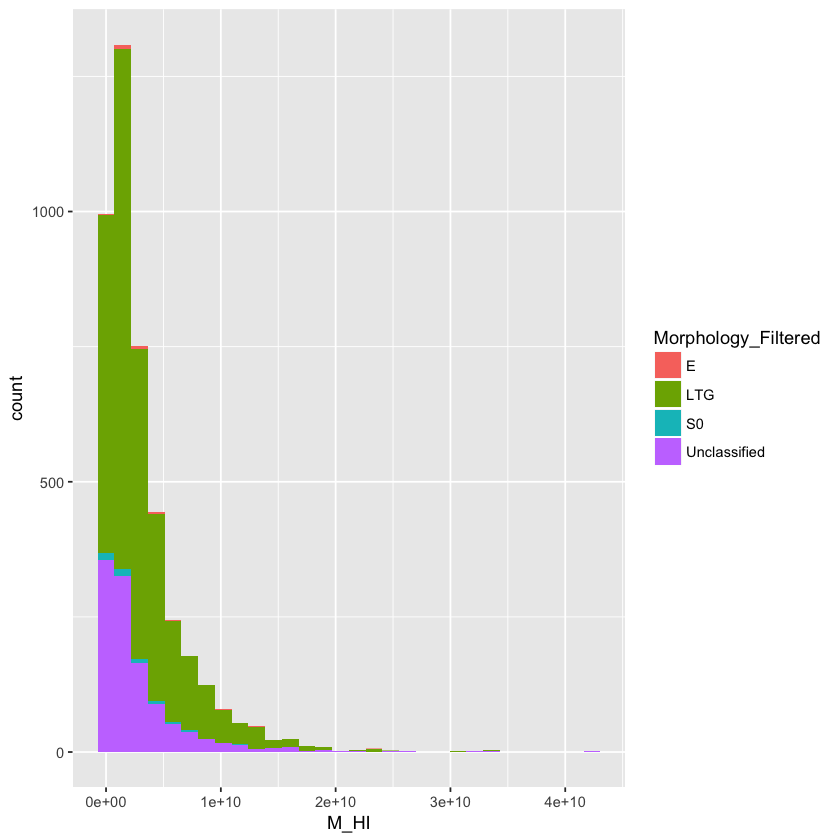

In [247]:
ggplot(df_HIPASS,aes(M_HI,fill=Morphology_Filtered)) + #setup the base plot and factoring
    geom_histogram()  #change the transparency for the curves


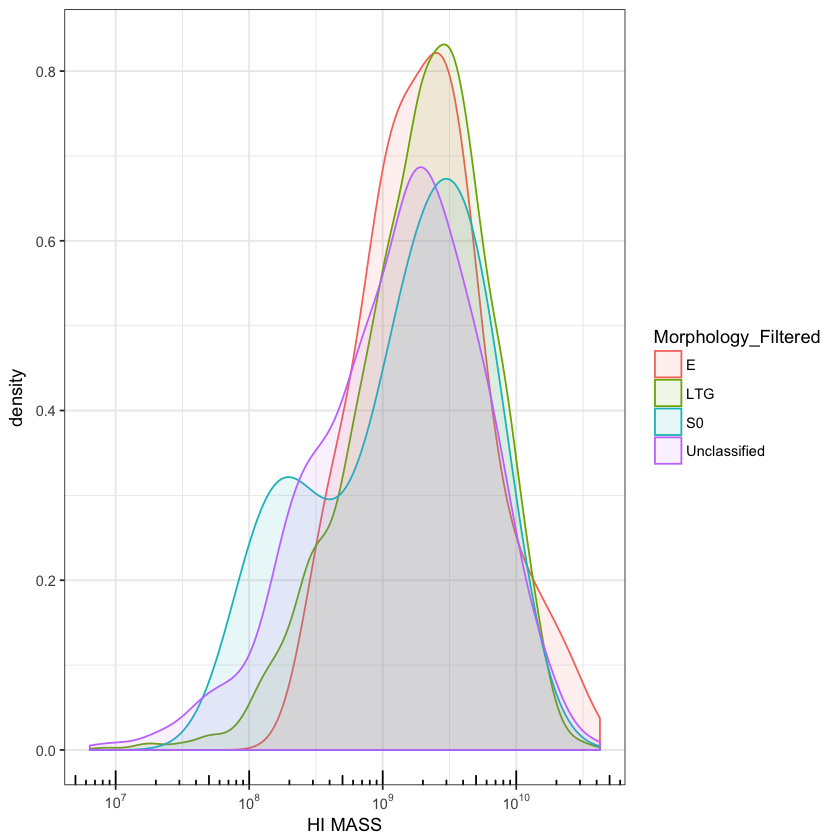

In [117]:
ggplot(df_HIPASS,aes(M_HI,color=Morphology_Filtered,fill=Morphology_Filtered)) + #setup the base plot and factoring
    geom_density(alpha=0.1) + #change the transparency for the curves
    xlab("HI MASS") + #label x=axis
    theme_bw() + #change the background theme 
     scale_x_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="b") #fancy tick marks

# Let's Look At How MHI Depends on A Few Variables

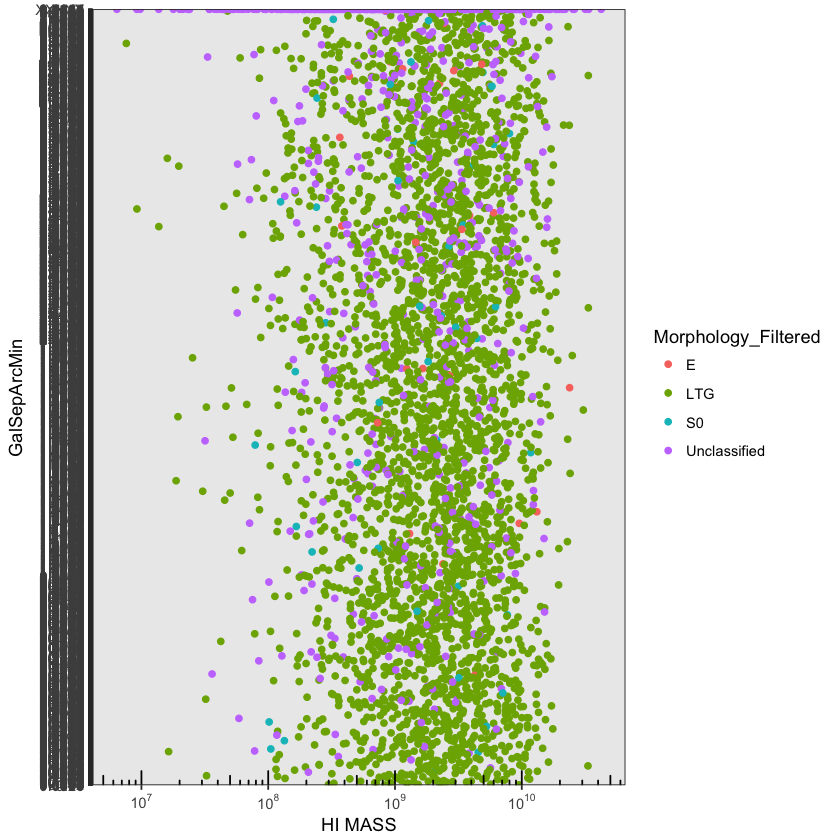

In [156]:
ggplot(df_HIPASS,aes(x=M_HI,y=GalSepArcMin,color=Morphology_Filtered,fill=Morphology_Filtered)) + #setup the base plot and factoring
    geom_point() + #plot points and change the transparency for the curves
    xlab("HI MASS") + #label x=axis
    theme_bw() + #change the background theme 
     scale_x_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="b") #fancy tick marks

# uhhhhhh what? 

In [159]:
summary(df_HIPASS$GalSepArcMin)

XXXXX  0.3117   1.003  0.0978  0.1283   0.273   0.286   0.348  0.3579   0.377 
    697       3       3       2       2       2       2       2       2       2 
 0.3905  0.4138  0.4623  0.4758  0.4781  0.5578  0.5606  0.5814  0.5844  0.6982 
      2       2       2       2       2       2       2       2       2       2 
 0.7021  0.7044  0.7085  0.7103  0.7185  0.7492  0.7526  0.7683  0.7715  0.7839 
      2       2       2       2       2       2       2       2       2       2 
 0.8151  0.8158  0.8497  0.8626  0.8647  0.8795  0.8918  0.8948  0.9185  0.9269 
      2       2       2       2       2       2       2       2       2       2 
 0.9499  0.9505  0.9555  0.9669  0.9807  0.9871  0.9925  0.9937  0.9946  0.9979 
      2       2       2       2       2       2       2       2       2       2 
 1.0052  1.0063  1.0112  1.0281  1.0432  1.0474  1.0486  1.0495   1.067   1.075 
      2       2       2       2       2       2       2       2       2       2 
 1.0772  1.0887  1.1127  1.1134  1.1158  1.1217  1.1334  1.1673    1.17  1.1716 
      2       2       2       2       2       2       2       2       2       2 
 1.1928   1.217  1.2253  1.2492  1.2495    1.26  1.3065   1.322  1.3814  1.3879 
      2       2       2       2       2       2       2       2       2       2 
 1.4241  1.4458  1.4536  1.4541  1.4781  1.4978  1.5046  1.5294  1.5604  1.5648 
      2       2       2       2       2       2       2       2       2       2 
 1.6609  1.6674  1.6807  1.7077  1.7342  1.7426  1.7784  1.7936  1.8136 (Other) 
      2       2       2       2       2       2       2       2       2    3420

# It's a factor, not a numeric :(

In [160]:
df_HIPASS$GalSepArcMin=as.numeric(as.character(df_HIPASS$GalSepArcMin))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

Warning message:
“Removed 697 rows containing missing values (geom_point).”

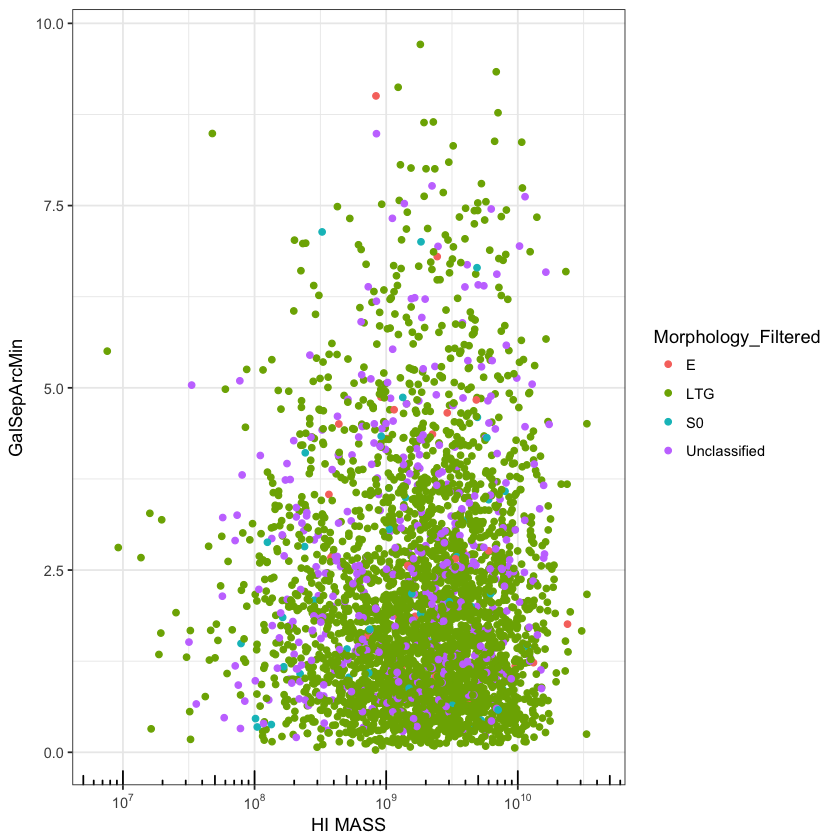

In [161]:
ggplot(df_HIPASS,aes(x=M_HI,y=GalSepArcMin,color=Morphology_Filtered,fill=Morphology_Filtered)) + #setup the base plot and factoring
    geom_point() + #plot points and change the transparency for the curves
    xlab("HI MASS") + #label x=axis
    theme_bw() + #change the background theme 
     scale_x_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="b") #fancy tick marks

# Subset the data to avoid unclassified

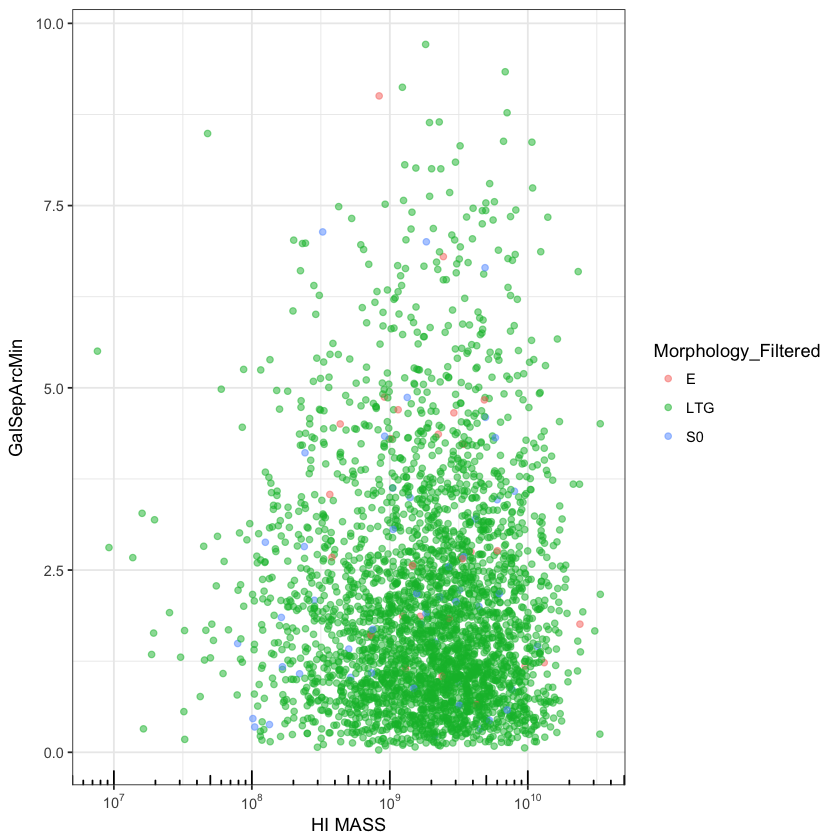

In [162]:
ggplot(data=subset(df_HIPASS,Morphology_Filtered != "Unclassified"),
                   aes(x=M_HI,y=GalSepArcMin,color=Morphology_Filtered,fill=Morphology_Filtered)) + #setup the base plot and factoring
    geom_point(alpha=0.5) + #plot points and change the transparency for the curves
    xlab("HI MASS") + #label x=axis
    theme_bw() + #change the background theme 
     scale_x_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="b") #fancy tick marks

# Add a linear fit with errors

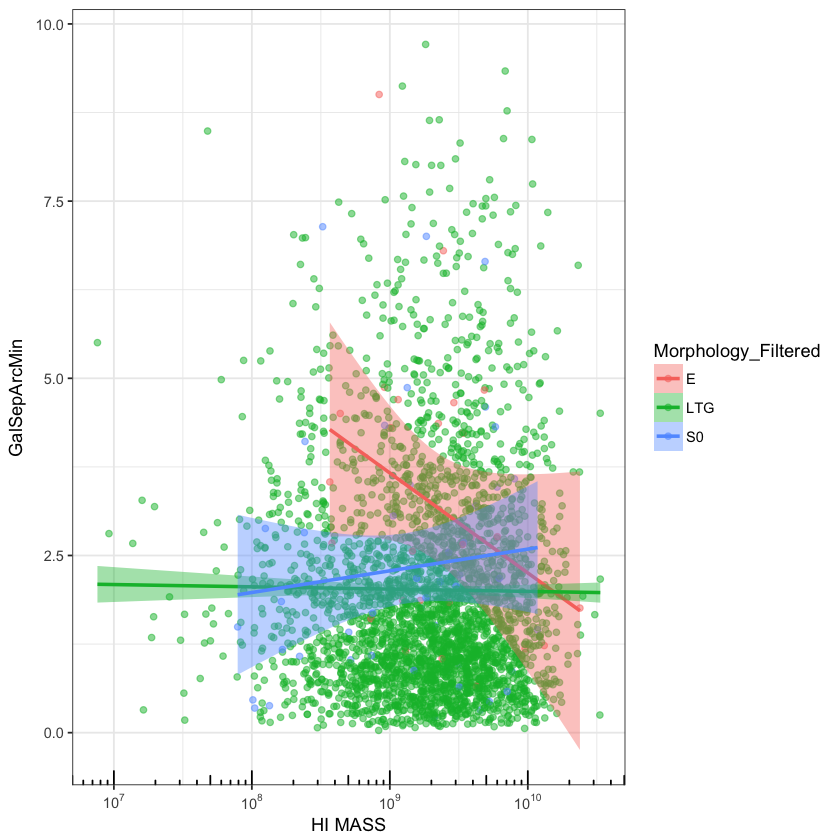

In [163]:
ggplot(data=subset(df_HIPASS,Morphology_Filtered != "Unclassified"),
                   aes(x=M_HI,y=GalSepArcMin,color=Morphology_Filtered,fill=Morphology_Filtered)) + #setup the base plot and factoring
    geom_point(alpha=0.5) +#plot points and change the transparency for the curves
    xlab("HI MASS") + #label x=axis
    theme_bw() + #change the background theme 
     scale_x_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="b") + #fancy tick marks
      geom_smooth(method = "lm") #lm= linear method

# Maybe you prefer density contours?


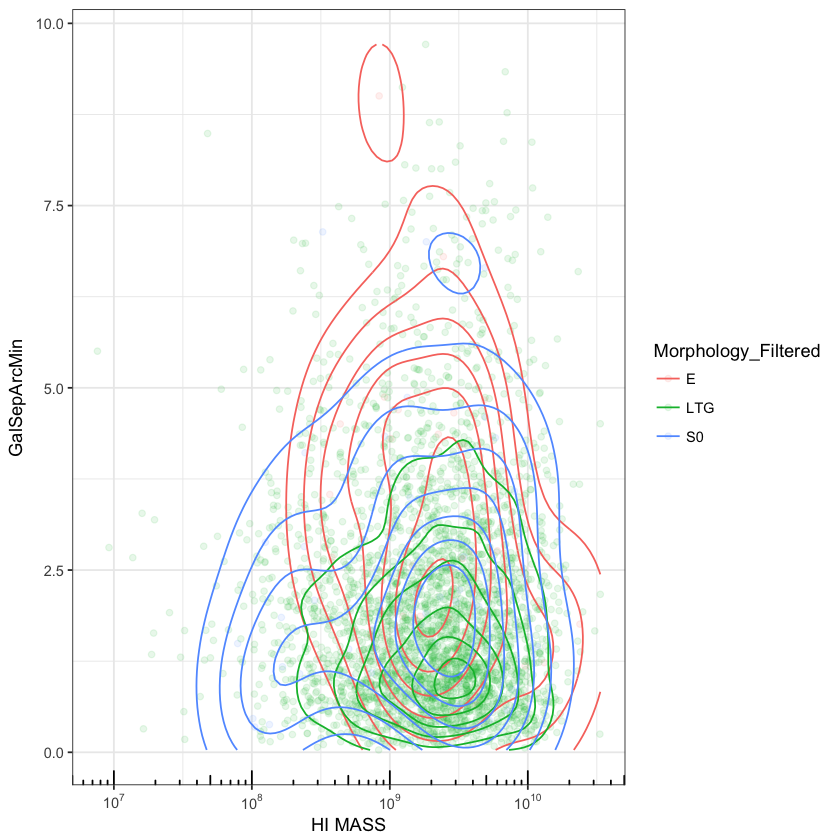

In [165]:
ggplot(data=subset(df_HIPASS,Morphology_Filtered != "Unclassified"),
                   aes(x=M_HI,y=GalSepArcMin,color=Morphology_Filtered,fill=Morphology_Filtered)) + #setup the base plot and factoring
    geom_point(alpha=0.1) +#plot points and change the transparency for the curves
    xlab("HI MASS") + #label x=axis
    theme_bw() + #change the background theme 
     scale_x_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="b") + #fancy tick marks
      geom_density_2d() #lm= linear method

# Bar Plot

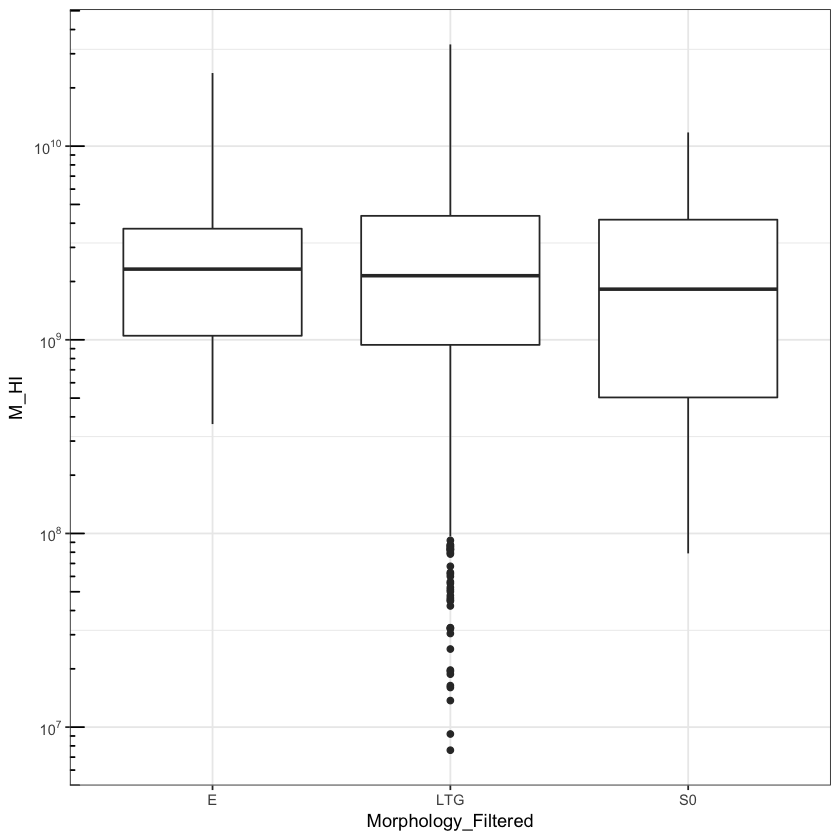

In [143]:
ggplot(data=subset(df_HIPASS,Morphology_Filtered != "Unclassified"),
                   aes(y=M_HI,x=Morphology_Filtered)) + #setup the base plot and factoring
    theme_bw() + #change the background theme 
         geom_boxplot( ) +
scale_y_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="l")

# Let's Get Quantitative / Complicated

In [144]:
f <- function(x) {
  r <- quantile(x, probs = c(0.025, 0.1573, 0.5, 0.84, 0.975))
  names(r) <- c("ymin", "lower", "middle", "upper", "ymax")
  r
}

Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: width”

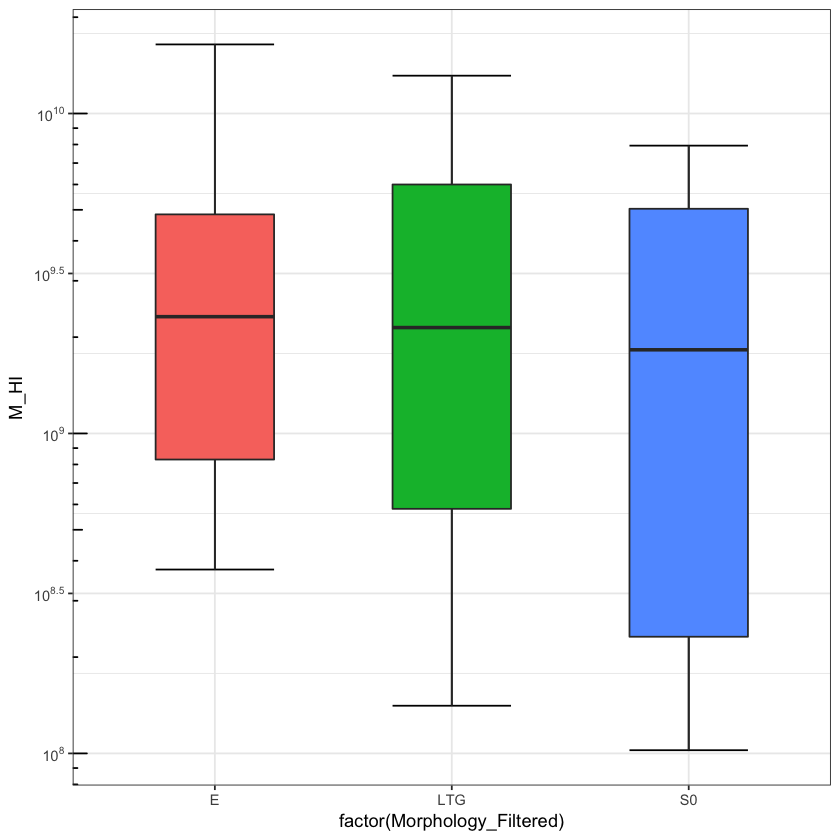

In [149]:
ggplot(data=subset(df_HIPASS,Morphology_Filtered != "Unclassified"),
                   aes(factor(Morphology_Filtered),M_HI)) + #setup the base plot and factoring
    theme_bw() + #change the background theme 

stat_summary(fun.data = f, geom="errorbar",aes(fill=Morphology_Filtered,width=0.5)) +
stat_summary(fun.data = f, geom="boxplot",aes(fill=Morphology_Filtered,width=0.5),position="dodge") +
scale_y_log10( breaks = scales::trans_breaks("log10", function(x) 10^x), #fancy tick marks
   labels = scales::trans_format("log10", scales::math_format(10^.x))) + #fancy tick marks
    annotation_logticks(side="l") + theme(legend.position="none")

In [ ]:
ggsave("boxplot.pdf")

# Maybe however many galaxies are around matters aka Loops!

In [150]:
df_HIPASS$X=df_HIPASS$Distance*sin((90-df_HIPASS$Dec) * DEG_TO_RAD)*cos(df_HIPASS$RA * DEG_TO_RAD) #put galaxies on unit sphere
df_HIPASS$Y=df_HIPASS$Distance*sin((90-df_HIPASS$Dec) * DEG_TO_RAD)*sin(df_HIPASS$RA * DEG_TO_RAD) 
df_HIPASS$Z=df_HIPASS$Distance*cos((90-df_HIPASS$Dec) * DEG_TO_RAD)

In [155]:
rp_distances<-df_HIPASS$Distances*0
xyz_distances<-df_HIPASS$Distances*0
rp_distances_id<-df_HIPASS$Distances*0

for(i in c(1:length(df_HIPASS$X))){
    for(j in c(2:length(df_HIPASS$X))) {
             xyz_distances[j]=(df_HIPASS$X[i] - df_HIPASS$X[j])^2 + 
                              (df_HIPASS$Y[i] - df_HIPASS$Y[j])^2 + 
                              (df_HIPASS$Z[i] - df_HIPASS$Z[j])^2
    }
     rp_sqr_sorted<-sort(xyz_distances, method = "shell", index.return = TRUE)
     rp_distances[i]<-rp_sqr_sorted$x[3]
     rp_distances_id[i]<-rp_sqr_sorted$ix[3]
}
df_HIPASS$ThirdNN_MPC=sqrt(rp_distances)

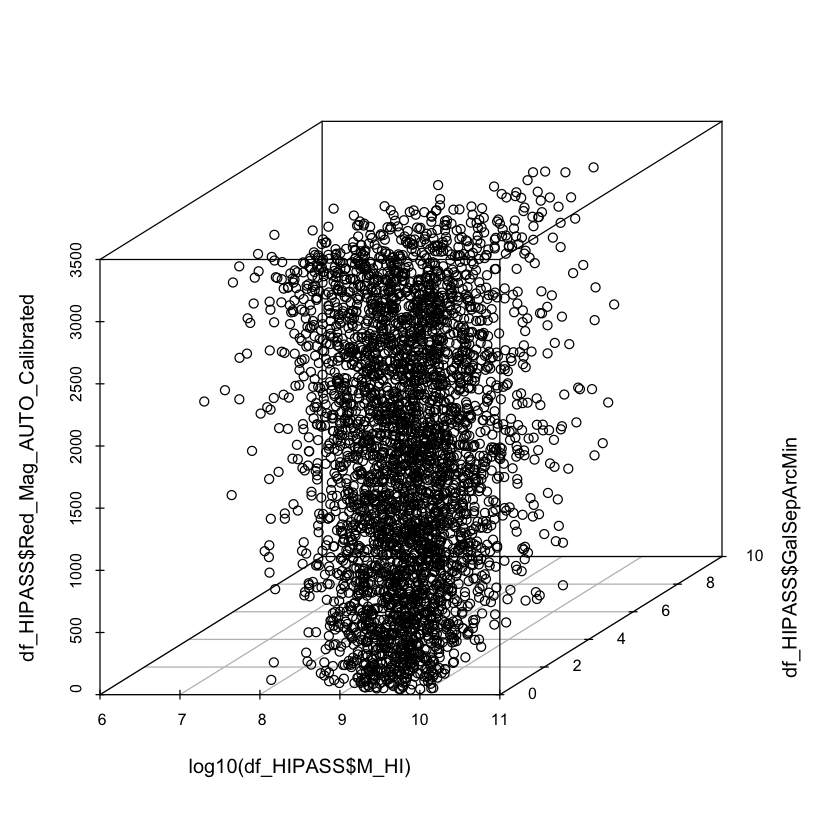

In [166]:
scatterplot3d(log10(df_HIPASS$M_HI),df_HIPASS$GalSepArcMin,df_HIPASS$Red_Mag_AUTO_Calibrated)

# Ok, that's not very useful. We want to find correlations in the data.

In [92]:
df_HIPASS=na.omit(df_HIPASS) #only galaxies with morphology classifcations
galaxy_df=data.frame( #setting up a data frame that's a subset of the HIPASS data frame
                  RA=df_HIPASS$RA,
                  Dec=df_HIPASS$Dec,
                  Distance=df_HIPASS$Distance,
                  Bj_mag=df_HIPASS$Bj_Mag_AUTO_Calibrated,
                  R_mag=df_HIPASS$Red_Mag_AUTO_Calibrated,
                  Morphology=df_HIPASS$Morphology_Filtered,
                  M_HI=df_HIPASS$M_HI)
write.table(galaxy_df,"HIPASS_clean.txt",sep="\t",row.names = FALSE,col.names = FALSE,quote = FALSE)

# We're going to use a new package to find the correlations

In [82]:
install.packages("GGally")


The downloaded binary packages are in
	/var/folders/wg/b98yz4q5093blszwgjmy98z40000gn/T//RtmpLUl4hH/downloaded_packages


In [83]:
library('GGally')

In [93]:
ggpairs(galaxy_df) 

ERROR: Error in stop_if_high_cardinality(data, columns, cardinality_threshold): Column 'Bj_mag' has more levels (3466) than the threshold (15) allowed.
Please remove the column or increase the 'cardinality_threshold' parameter. Increasing the cardinality_threshold may produce long processing times


# What's this about? The Magnitudes are 'characters' not 'numeric' because they have too many digits (well known R 'feature'). We'll fix that by coercing the characters into numbers. R will complain.

In [95]:
galaxy_df$Bj_mag=as.numeric(as.character(galaxy_df$Bj_mag))


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 697 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 697 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 697 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 697 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 697 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 697 rows containing missing values”Warning message:
“Removed 697 rows containing missing values (geom_point).”Warning message:
“Removed 697 rows containing missing values (geom_point).”Warning message:
“Removed 697 rows containing missing values (ge

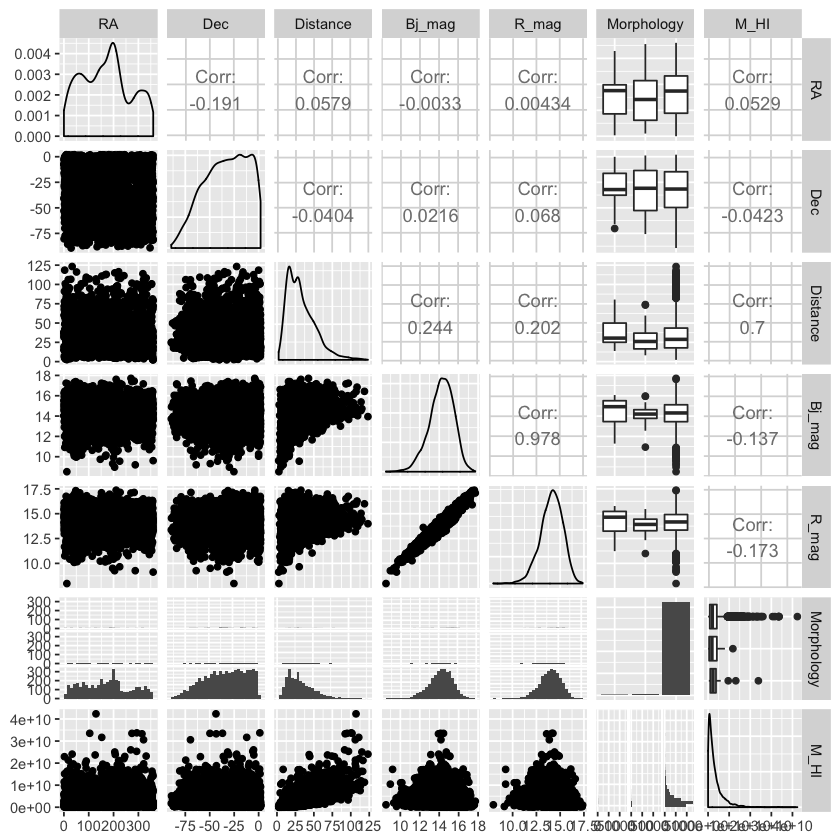

In [96]:
ggpairs(galaxy_df)

ERROR: Error in if (cos_Theta > 0.99984769502) {: argument is of length zero
